## Лабораторная работа №1 | Вариант 3

Выполнил:

### 1. Numpy

In [1]:
import numpy as np

1. Создайте массив D размером 4x4, заполненный числами от 1 до 16. Используйте срезы, чтобы извлечь подмассив размером 2x2, начиная с элемента в строке 1 и столбце 1.

In [60]:
D = np.arange(1, 17).reshape(4, 4)
subarr = D[1:3, 1:3]
print(subarr)

[[ 6  7]
 [10 11]]


2. Создайте трехмерный массив a размером 4x3x2, заполненный случайными числами от 1 до 10. Найдите сумму всех элементов вдоль оси 1.

In [49]:
a = np.random.randint(1, 11, (4, 3, 2))
sum = a.sum(axis=1)
print(sum)

[[20 19]
 [16 22]
 [24 21]
 [12 16]]


3. Напишите функцию, которая принимает матрицу и производит нормировку её элементов (т.е. $A'_{ij} = A_{ij} / \sum_{i} \sum_{j} A_{ij}$)

In [51]:
def normalize_matrix(A):
    return A / A.sum()

matrix = np.array([[1, 2], [3, 4]])
print(normalize_matrix(matrix))

[[0.1 0.2]
 [0.3 0.4]]


4. Напишите функцию, которая принимает 3 трехмерных вектора $x, y, z$ и вычисляет объем пирамиды, образованной этими векторами (используйте смешанное произведение векторов)

In [56]:
def pyramid_volume(x, y, z):
    return abs(np.dot(x, np.cross(y, z))) / 6

x = np.array([1, 0, 0])
y = np.array([0, 1, 0])
z = np.array([0, 0, 1])
print(pyramid_volume(x, y, z))

0.16666666666666666


5. Напишите функцию, которая принимает число N и строит матрицу NxN, с нулями внутри и единицами на границе.

In [114]:
def create_border_matrix(N):
    matrix = np.ones((N, N), dtype=int)
    matrix[1:-1,1:-1] = 0
    return matrix

print(create_border_matrix(3))

[[1 1 1]
 [1 0 1]
 [1 1 1]]


6. Создайте матрицу шахматную доску 8х8 используя функцию `tile`

In [63]:
chessboard = np.tile([[0, 1], [1, 0]], (4, 4))
print(chessboard)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


7. Как найти наиболее близкое значение (к заданному скаляру) в векторе?

In [93]:
vector = np.array([1, 10, 100, 1000])
scalar = 55
closest = vector[np.argmin(np.abs(vector - scalar))]
print(closest)

10


8. Создайте случайный вектор размером 10 и отсортируйте его

In [116]:
vector = np.random.randint(1, 100, 10)
print(vector)
vector.sort()
print(vector)

[88 91 26  9 39 94 86 74 34 50]
[ 9 26 34 39 50 74 86 88 91 94]


9. Создайте случайный вектор длиной 10 и замените максимальное значение в нем на 0

In [120]:
vector = np.random.randint(1, 100, 10)
print(vector)
vector[vector.argmax()] = 0
print(vector)

[ 8 52 23 13 31 79 99 35 52 15]
[ 8 52 23 13 31 79  0 35 52 15]


10. Даны 2 массива Х и Y, постройте матрицу Коши $C$ ($C_{ij} = \frac{1}{x_i - y_j}$)

In [106]:
X = np.array([1, 2, 3])
Y = np.array([4, 5, 6])
C = 1.0 / np.subtract.outer(X, Y)
print(C)

[[-0.33333333 -0.25       -0.2       ]
 [-0.5        -0.33333333 -0.25      ]
 [-1.         -0.5        -0.33333333]]


### 2. Pandas

Представлено 2 датасета в формате CSV.

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Файлы: `countries.csv`, `covid-country-data.csv`

In [128]:
import pandas as pd

In [174]:
data = pd.read_csv('countries.csv')

In [173]:
covid_data = pd.read_csv('covid-country-data.csv')

In [130]:
data.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495


In [172]:
covid_data.head()

,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN


1. Какое общее население планеты, согласно датасету?

In [147]:
total_population = data['population'].sum()
print(total_population)

7757980095.0


2. Выведите страну с наименьшей продолжительностью жизни

In [149]:
min_life_expectancy = data.loc[data['life_expectancy'].idxmin(), 'location']
print(min_life_expectancy)

Central African Republic


3. Выведите страну с наибольшим ВВП на душу населения ('gdp_per_capita')

In [150]:
max_gdp_country = data.loc[data['gdp_per_capita'].idxmax(), 'location']
print(max_gdp_country)

Qatar


4. Заполните пропуски в 'life_expectancy' медианным значением и посчитайте среднюю продолжительность жизни

In [153]:
median_life_expectancy = data['life_expectancy'].median()
data.update(data[['life_expectancy']].fillna(median_life_expectancy))
avg_life_expectancy = data['life_expectancy'].mean()
print(avg_life_expectancy)

73.55214285714285


5. Выведите топ-15 стран по численности населения

In [168]:
top = data.nlargest(15, 'population')[['location', 'population']]
print("Top 15 by population:")
print(top.to_string(index=False))

Top 15 by population:
     location   population
        China 1439323774.0
        India 1380004385.0
United States  331002647.0
    Indonesia  273523621.0
     Pakistan  220892331.0
       Brazil  212559409.0
      Nigeria  206139587.0
   Bangladesh  164689383.0
       Russia  145934460.0
       Mexico  128932753.0
        Japan  126476458.0
     Ethiopia  114963583.0
  Philippines  109581085.0
        Egypt  102334403.0
      Vietnam   97338583.0


6. Среди стран, входящих в топ-25 по ВВП на душу населения (gdp_per_capita) выведите 5 стран с наименьшим населением

In [169]:
top_gdp = data.nlargest(25, 'gdp_per_capita')
min_population_in_top = top_gdp.nsmallest(5, 'population')[['location', 'gdp_per_capita', 'population']]
print("5 countries with the smallest population among top 25 GDP:")
print(min_population_in_top.to_string(index=False))


5 countries with the smallest population among top 25 GDP:
      location  gdp_per_capita  population
    San Marino       56861.470     33938.0
       Bermuda       50669.315     62273.0
Cayman Islands       49903.029     65720.0
       Iceland       46482.958    341250.0
        Brunei       71809.251    437483.0


7. Соедините таблицы covid-country-data и countries

In [247]:
merged_data = pd.merge(data, covid_data, on='location', how='outer')
merged_data.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_cases,total_deaths,total_tests
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,38243.0,1409.0,NaN
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,9728.0,296.0,NaN
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,45158.0,1525.0,NaN
3,Andorra,Europe,77265.0,83.73,NaN,NaN,1199.0,53.0,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,2729.0,109.0,NaN


8. Добавьте для всех стран добавьте колонку, в которой была бы отражена смертность на 1 млн человек населения (пропуски заполните средним значением)

In [263]:
merged_data['deaths_per_million'] = (merged_data['total_deaths'] / merged_data['population']) * 1_000_000
mean_deaths_per_million = merged_data['deaths_per_million'].mean()
merged_data['deaths_per_million'] = merged_data['deaths_per_million'].fillna(mean_deaths_per_million)
merged_data.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_cases,total_deaths,total_tests,deaths_per_thousand,deaths_per_million
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,38243.0,1409.0,0.0,0.036195,36.194710
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,9728.0,296.0,0.0,0.102856,102.856349
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,45158.0,1525.0,0.0,0.034777,34.776824
3,Andorra,Europe,77265.0,83.73,NaN,NaN,1199.0,53.0,0.0,0.685951,685.950948
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,2729.0,109.0,0.0,0.003316,3.316470


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Сделайте круговую диаграмму, на которой были бы отражено число заболеваний COVID-19 по континентам

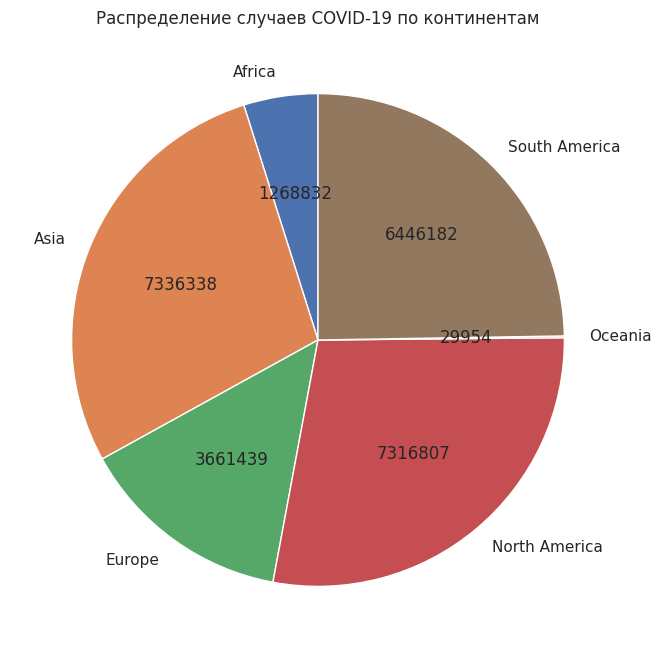

In [294]:
plt.figure(figsize=(8, 8))
cases_by_continent = merged_data.groupby('continent')['total_cases'].sum()
def format(x):
    num = int(round(x * total_cases / 100))
    return f'{num}'
cases_by_continent.plot(kind='pie', autopct=format, startangle=90)
plt.title('Распределение случаев COVID-19 по континентам')
plt.ylabel('')
plt.show()

2. Постройте диаграмму, на которой в порядке убывания были бы отмечены число тестов на COVID-19 в России, Китае, США, Индии и Нигерии

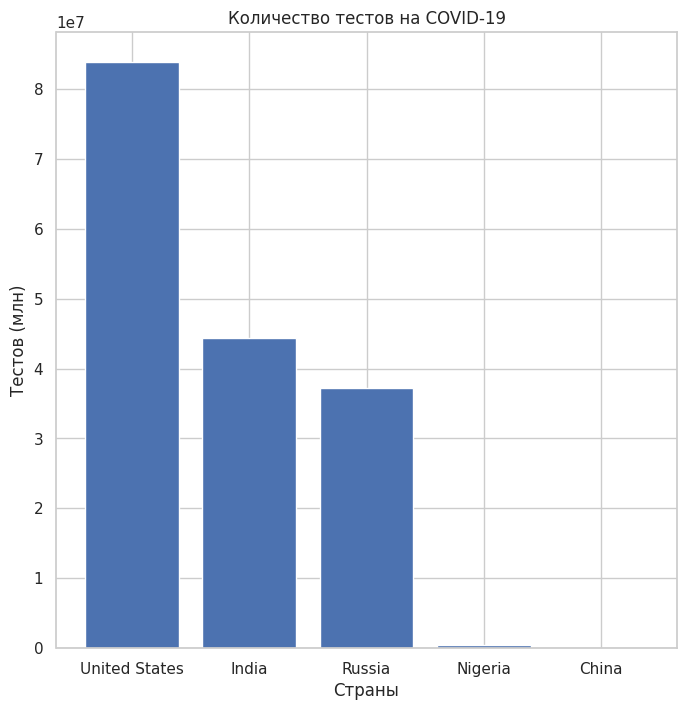

In [259]:
merged_data['total_tests'] = merged_data['total_tests'].fillna(0)
plt.figure(figsize=(8, 8))
selected_countries = ['Russia', 'China', 'United States', 'India', 'Nigeria']
tests_data = merged_data[merged_data['location'].isin(selected_countries)]
tests_data = tests_data.sort_values('total_tests', ascending=False)
plt.bar(tests_data['location'], tests_data['total_tests'])
plt.title('Количество тестов на COVID-19')
plt.xlabel('Страны')
plt.ylabel('Тестов (млн)')
plt.show()

3. Визуализируйте зависимость ВВП страны и случаев заболевания COVID-19

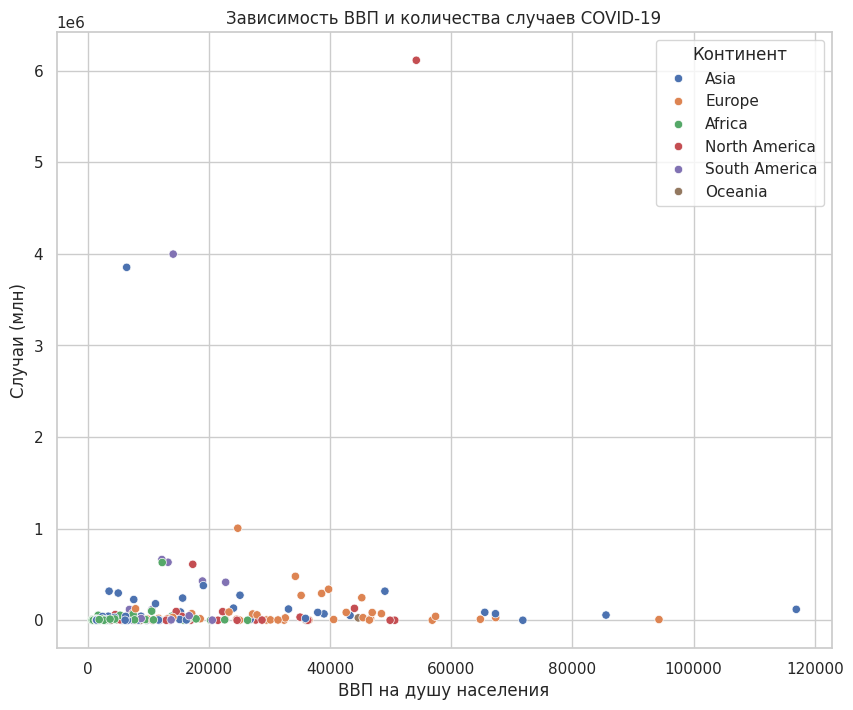

In [260]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_data, x='gdp_per_capita', y='total_cases', hue='continent')
plt.title('Зависимость ВВП и количества случаев COVID-19')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Случаи (млн)')
plt.legend(title='Континент')
plt.grid(True)
plt.show()

4. Постройте гистограмму распределения количества смертей на один миллион человек

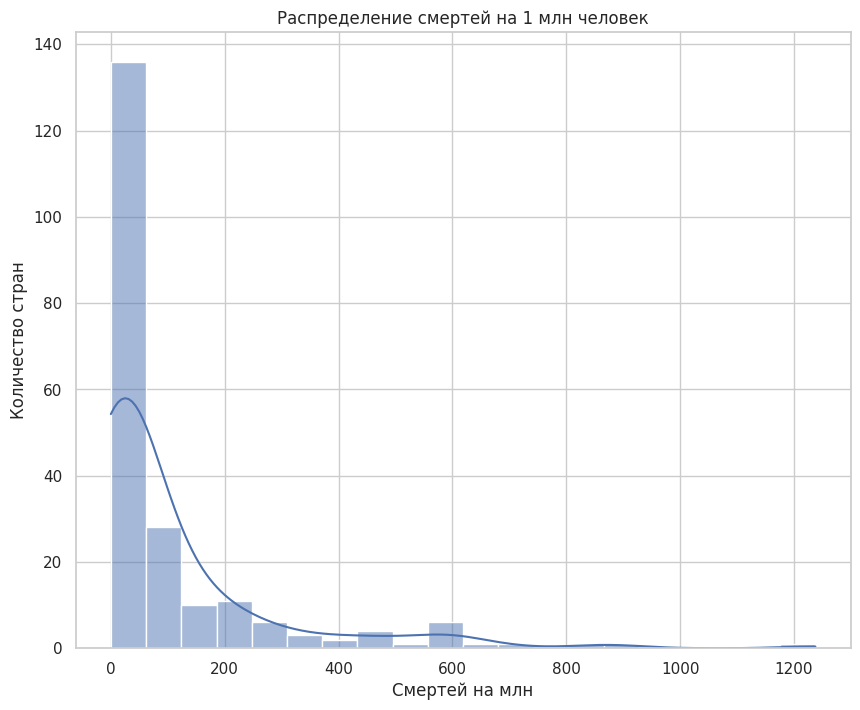

In [265]:
plt.figure(figsize=(10, 8))
sns.histplot(data=merged_data, x='deaths_per_million', bins=20, kde=True)
plt.title('Распределение смертей на 1 млн человек')
plt.xlabel('Смертей на млн')
plt.ylabel('Количество стран')
plt.grid(True)
plt.show()

5. Постройте диаграмму отображающую среднюю продолжительность жизни в разных странах европы

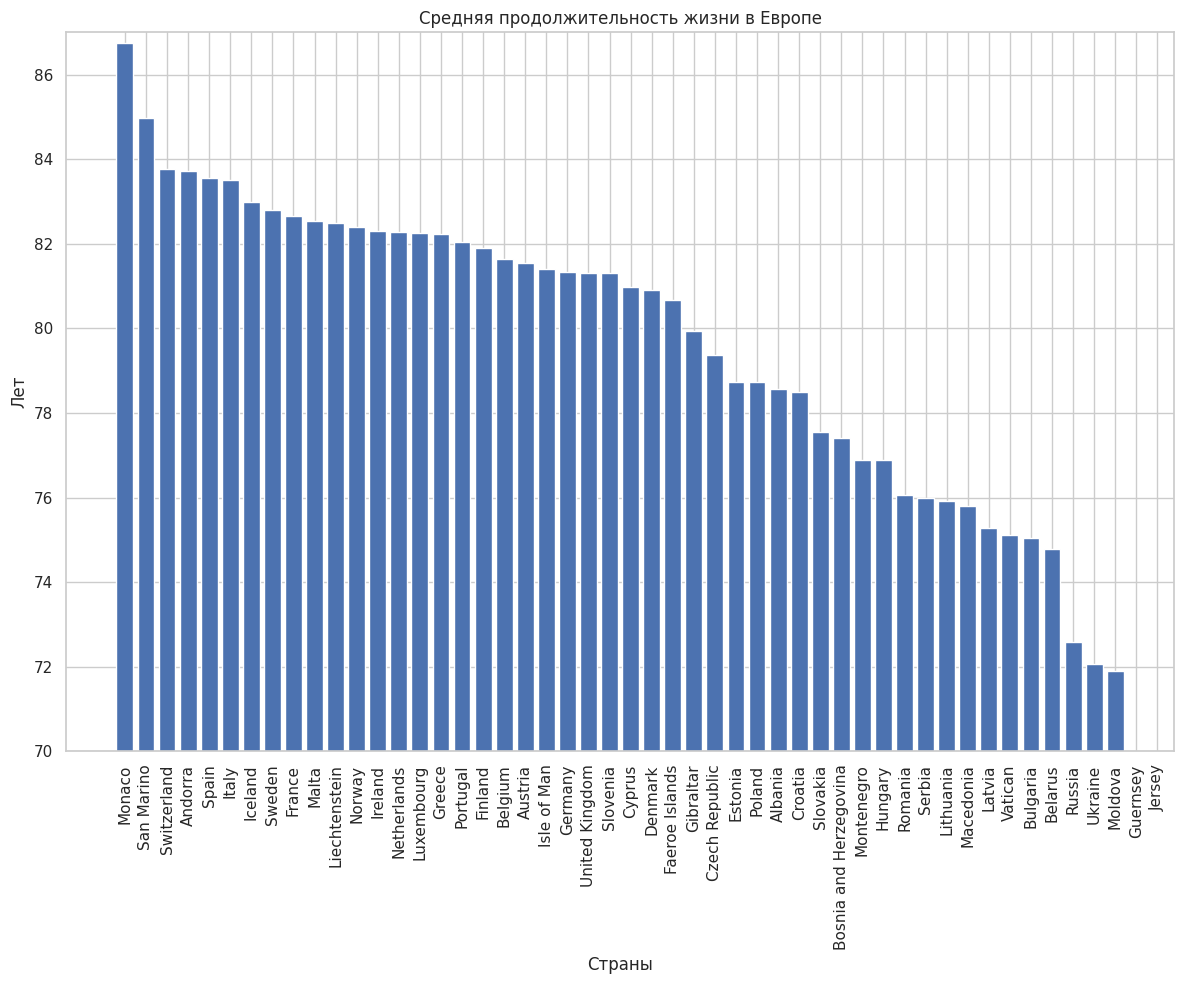

In [266]:
plt.figure(figsize=(12, 10))
europe_data = merged_data[merged_data['continent'] == 'Europe']
europe_data = europe_data.sort_values('life_expectancy', ascending=False)
plt.bar(europe_data['location'], europe_data['life_expectancy'])
plt.title('Средняя продолжительность жизни в Европе')
plt.xlabel('Страны')
plt.ylabel('Лет')
plt.xticks(rotation=90)
plt.ylim(70, 87)
plt.grid(True)
plt.tight_layout()
plt.show()

6. Сравните распределения кол-ва смертей на 1000 человек в Европе и Африке

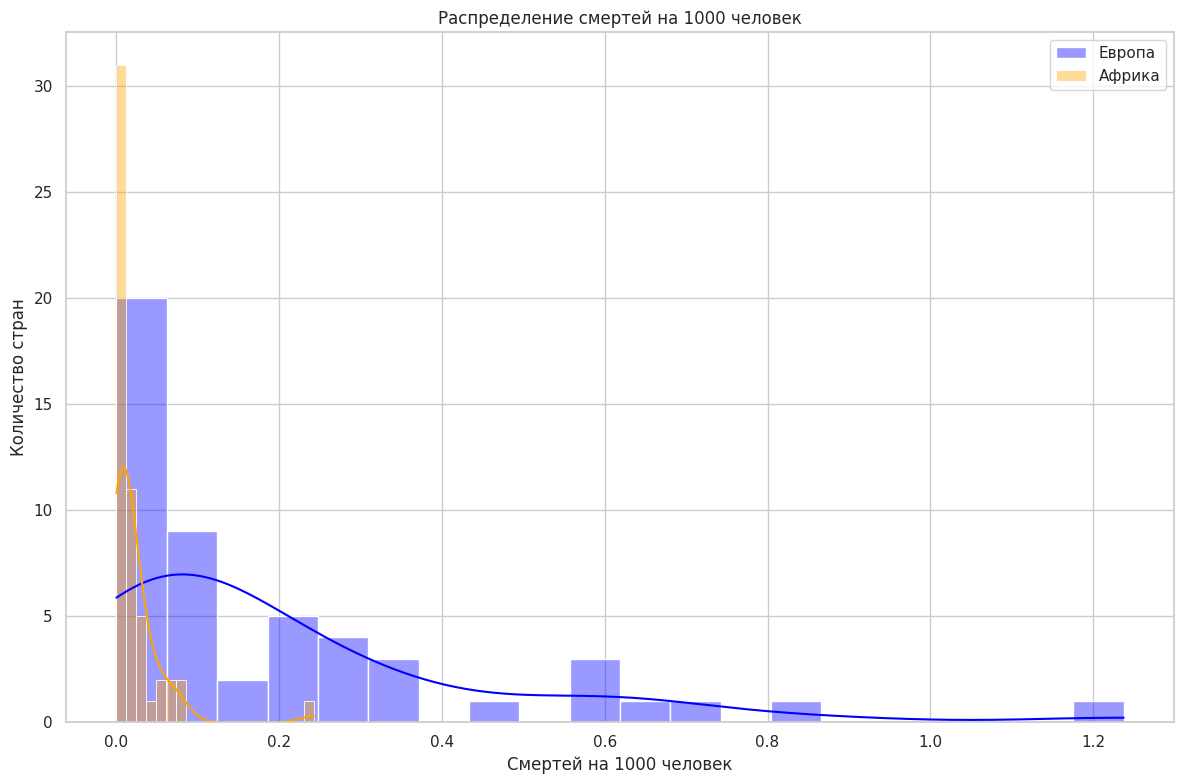

In [281]:
plt.figure(figsize=(12, 8))
europe = merged_data[merged_data['continent'] == 'Europe']['deaths_per_million'] / 1000
africa = merged_data[merged_data['continent'] == 'Africa']['deaths_per_million'] / 1000
sns.histplot(europe, bins=20, color='blue', kde=True, alpha=0.4, label='Европа')
sns.histplot(africa, bins=20, color='orange', kde=True, alpha=0.4, label='Африка')
plt.title('Распределение смертей на 1000 человек')
plt.xlabel('Смертей на 1000 человек')
plt.ylabel('Количество стран')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()